<a href="https://colab.research.google.com/github/racoope70/daytrading-with-ml/blob/main/multi_stock_XGBoost_rf_walkforward.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt-get remove --purge -y cuda* libcuda* nvidia* || echo "No conflicting CUDA packages"
!apt-get autoremove -y
!apt-get clean

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'cuda-toolkit-12-4-config-common' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-11-0' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-11-1' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-11-7' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-11-8' for glob 'cuda*'
Note, selecting 'cuda-toolkit-12-5-config-common' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-0' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-1' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-2' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-3' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-4' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-5' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-6' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-8' for glob 'cuda*'
Note, selecting 'cuda-toolkit-12-6-config-common' for glob 'cuda*'
Note, selecting 'cuda-opencl-d

In [2]:
#Protocol Buffer Fix (for TensorFlow)
!pip uninstall -y protobuf
!pip install protobuf==3.20.3

Found existing installation: protobuf 5.29.4
Uninstalling protobuf-5.29.4:
  Successfully uninstalled protobuf-5.29.4
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 4.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
grpcio-status 1.71.0 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 3.20.3 which is incompatible.
ydf 0.11.0 requires protobuf<6.0.0,>=5.29.1, but you have protobuf 3.20.3 which is incompatible.
tensorflow-metadata 1.17.0 requires protobuf<6.0.0,>=4.25.2; python_version >= "3.11", but you have protobuf 3.20.3 which is incompatible.


In [3]:
#Update Colab Environment and System Libraries
!apt-get update -y && apt-get upgrade -y


Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:6 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,384 kB]
Hit:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,697 kB]
Get:10 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [3,140 kB]
Get:11 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,844 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,542 kB]
Get:13 http://archive.ubuntu.com/ubuntu jam

In [4]:
#Install Correct Version of CUDA for Colab GPU
!apt-get update -qq && apt-get install -y \
    libcusolver11 libcusparse11 libcurand10 libcufft10 libnppig10 libnppc10 libnppial10 \
    cuda-toolkit-12-4

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package libnppig10
E: Unable to locate package libnppc10
E: Unable to locate package libnppial10


In [5]:
#Set Correct CUDA Paths
import os
os.environ['CUDA_HOME'] = '/usr/local/cuda-12.4'
os.environ['PATH'] += ':/usr/local/cuda-12.4/bin'
os.environ['LD_LIBRARY_PATH'] += ':/usr/local/cuda-12.4/lib64'


In [6]:
#Install RAPIDS and NVIDIA Dependencies
!pip install --extra-index-url=https://pypi.nvidia.com \
    cuml-cu12==25.2.0 cudf-cu12==25.2.0 cupy-cuda12x dask-cuda==25.2.0 dask-cudf-cu12==25.2.0


Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 58.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 141.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 55.7 MB/s eta 0:00:00
  Attempting uninstall: cudf-cu12
    Found existing installation: cudf-cu12 25.2.1
    Uninstalling cudf-cu12-25.2.1:
      Successfully uninstalled cudf-cu12-25.2.1
  Attempting uninstall: dask-cudf-cu12
    Found existing installation: dask-cudf-cu12 25.2.2
    Uninstalling dask-cudf-cu12-25.2.2:
      Successfully uninstalled dask-cudf-cu12-25.2.2
  Attempting uninstall: cuml-cu12
    Found existing installation: cuml-cu12 25.2.1
    Uninstalling cuml-cu12-25.2.1:
      Successfully uninstalled cuml-cu12-25.2.1


In [7]:
#Install TensorFlow (latest GPU-compatible version)
!pip install tensorflow==2.18.0

#Install Stable Baselines3 and Trading Libraries
!pip install stable-baselines3[extra] gymnasium gym-anytrading yfinance xgboost joblib

#Install Miscellaneous Libraries
!pip install matplotlib scikit-learn pandas numba==0.61.0

#Install PyTorch with GPU Support
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu124


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.2/172.2 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 98.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 80.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 83.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.5/184.5 kB 14.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-c

In [8]:
#Install TensorFlow (latest GPU-compatible version)
!pip install tensorflow==2.18.0


import tensorflow as tf

gpus = tf.config.list_physical_devices("GPU")
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("TensorFlow GPU memory growth enabled")
    except RuntimeError as e:
        print(f"TensorFlow GPU memory config failed: {e}")


In [9]:
Install all required packages
!pip install stable-baselines3[extra] gymnasium gym-anytrading yfinance --quiet
!pip install stable-baselines3[extra] --quiet


In [10]:
#Import Required Libraries
import gc
import json
import os
import random
import time
from collections import deque
from datetime import datetime

import cupy as cp
import cudf
import cuml
import dask
import gymnasium as gym
import gym_anytrading
import joblib
import lightgbm as lgb
import matplotlib.pyplot as plt
import numba
import numpy as np
import pandas as pd
import torch
import xgboost as xgb
import yfinance as yf
from cuml.ensemble import RandomForestClassifier
from gym_anytrading.envs import StocksEnv
from gymnasium.spaces import Box
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from stable_baselines3 import PPO, SAC
from stable_baselines3.common.noise import NormalActionNoise
from stable_baselines3.common.vec_env import DummyVecEnv

#Ticker List and CONFIG
ticker_list = [
    'AAPL', 'TSLA', 'MSFT', 'GOOGL', 'AMZN', 'NVDA', 'META', 'BRK-B', 'JPM', 'JNJ',
    'XOM', 'V', 'PG', 'UNH', 'MA', 'HD', 'LLY', 'MRK', 'PEP', 'KO',
    'BAC', 'ABBV', 'AVGO', 'PFE', 'COST', 'CSCO', 'TMO', 'ABT', 'ACN', 'WMT',
    'MCD', 'ADBE', 'DHR', 'CRM', 'NKE', 'INTC', 'QCOM', 'NEE', 'AMD', 'TXN',
    'AMGN', 'UPS', 'LIN', 'PM', 'UNP', 'BMY', 'LOW', 'RTX', 'CVX', 'IBM',
    'GE', 'SBUX', 'ORCL'
]

strategy_name = "sac_ppo_td3_multi_stock_v1"

CONFIG = {
    'symbols': [],
    'period': '720d',
    'interval': '1h',
    'target': 'Target',
    'sharpe_threshold': 1.5,
    'return_threshold': 1.25,
    'strategy_name': strategy_name
}
#Import Required Libraries
import gc
import json
import os
import random
import time
from collections import deque
from datetime import datetime

import cupy as cp
import cudf
import cuml
import dask
import gymnasium as gym
import gym_anytrading
import joblib
import lightgbm as lgb
import matplotlib.pyplot as plt
import numba
import numpy as np
import pandas as pd
import torch
import xgboost as xgb
import yfinance as yf
from cuml.ensemble import RandomForestClassifier
from gym_anytrading.envs import StocksEnv
from gymnasium.spaces import Box
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from stable_baselines3 import PPO, SAC
from stable_baselines3.common.noise import NormalActionNoise
from stable_baselines3.common.vec_env import DummyVecEnv

#Ticker List and CONFIG
ticker_list = [
    'AAPL', 'TSLA', 'MSFT', 'GOOGL', 'AMZN', 'NVDA', 'META', 'BRK-B', 'JPM', 'JNJ',
    'XOM', 'V', 'PG', 'UNH', 'MA', 'HD', 'LLY', 'MRK', 'PEP', 'KO',
    'BAC', 'ABBV', 'AVGO', 'PFE', 'COST', 'CSCO', 'TMO', 'ABT', 'ACN', 'WMT',
    'MCD', 'ADBE', 'DHR', 'CRM', 'NKE', 'INTC', 'QCOM', 'NEE', 'AMD', 'TXN',
    'AMGN', 'UPS', 'LIN', 'PM', 'UNP', 'BMY', 'LOW', 'RTX', 'CVX', 'IBM',
    'GE', 'SBUX', 'ORCL'
]

strategy_name = "sac_ppo_td3_multi_stock_v1"

CONFIG = {
    'symbols': [],
    'period': '720d',
    'interval': '1h',
    'target': 'Target',
    'sharpe_threshold': 1.5,
    'return_threshold': 1.25,
    'strategy_name': strategy_name
}

def download_stock_data(ticker, period="720d", interval="1h", max_retries=5):
    for attempt in range(1, max_retries + 1):
        try:
            print(f"Attempt {attempt}: Downloading {ticker}...")
            df = yf.download(ticker, period=period, interval=interval)
            if not df.empty:
                df.reset_index(inplace=True)
                df['Symbol'] = ticker
                return df
            raise ValueError("Empty data")
        except Exception as e:
            print(f"Error: {e}. Retrying in {attempt * 5} sec...")
            time.sleep(attempt * 5)
    print(f"Failed to download {ticker}")
    return None

#Feature Engineering Function
def compute_enhanced_features(df):
    df = df.copy()
    if isinstance(df.columns, pd.MultiIndex):
        df.columns = df.columns.get_level_values(0)
    df = df.loc[:, ~df.columns.duplicated()]

    df['SMA_20'] = df['Close'].rolling(20).mean()
    df['STD_20'] = df['Close'].rolling(20).std()
    df['Upper_Band'] = df['SMA_20'] + 2 * df['STD_20']
    df['Lower_Band'] = df['SMA_20'] - 2 * df['STD_20']
    df['Lowest_Low'] = df['Low'].rolling(14).min()
    df['Highest_High'] = df['High'].rolling(14).max()
    denom = (df['Highest_High'] - df['Lowest_Low']).replace(0, np.nan)
    df['Stoch'] = ((df['Close'] - df['Lowest_Low']) / denom) * 100
    df['ROC'] = df['Close'].pct_change(10)
    df['OBV'] = (np.sign(df['Close'].diff()) * df['Volume']).cumsum()
    typical_price = (df['High'] + df['Low'] + df['Close']) / 3
    df['CCI'] = (typical_price - typical_price.rolling(20).mean()) / (0.015 * typical_price.rolling(20).std())
    df['PROC'] = ((df['Close'] - df['Close'].shift(12)) / df['Close'].shift(12)) * 100
    df['Rolling_Mean_50'] = df['Close'].rolling(50).mean()
    df['Expanding_Mean'] = df['Close'].expanding().mean()
    df['EMA_10'] = df['Close'].ewm(span=10).mean()
    df['EMA_50'] = df['Close'].ewm(span=50).mean()
    df['MACD_Line'] = df['Close'].ewm(span=12).mean() - df['Close'].ewm(span=26).mean()
    df['MACD_Signal'] = df['MACD_Line'].ewm(span=9).mean()
    df['MACD_Hist'] = df['MACD_Line'] - df['MACD_Signal']
    delta = df['Close'].diff()
    gain = delta.where(delta > 0, 0).rolling(14).mean()
    loss = -delta.where(delta < 0, 0).rolling(14).mean()
    rs = gain / loss
    df['RSI'] = 100 - (100 / (1 + rs))
    df['True_Range'] = df[['High', 'Low', 'Close']].apply(
        lambda x: max(x.iloc[0] - x.iloc[1], abs(x.iloc[0] - x.iloc[2]), abs(x.iloc[1] - x.iloc[2])), axis=1)
    df['ATR'] = df['True_Range'].rolling(14).mean()
    df['+DM'] = np.where((df['High'].diff() > df['Low'].diff()) & (df['High'].diff() > 0), df['High'].diff(), 0)
    df['-DM'] = np.where((df['Low'].diff() > df['High'].diff()) & (df['Low'].diff() > 0), df['Low'].diff(), 0)
    df['+DI'] = 100 * df['+DM'].rolling(14).mean() / df['ATR']
    df['-DI'] = 100 * df['-DM'].rolling(14).mean() / df['ATR']
    df['ADX'] = abs(df['+DI'] - df['-DI']).rolling(14).mean()
    df['Volume_Avg'] = df['Volume'].rolling(20).mean()
    df['Volume_Change'] = df['Volume'].pct_change()
    df['Volume_Change_MA'] = df['Volume_Change'].rolling(10).mean()
    df['Volume_Change_Ratio'] = df['Volume_Change'] / df['Volume_Change'].shift(1)
    df['Relative_Volume'] = df['Volume'] / df['Volume_Avg']
    df['Trailing_Stop'] = np.minimum(df['Close'] * 0.985, df['Close'] - (df['ATR'] * 0.3))
    df['Buy_Signal'] = np.where((df['RSI'] < 60) & (df['EMA_10'] > df['EMA_50']) &
                                ((df['MACD_Line'] > df['MACD_Signal']) | (df['MACD_Line'].diff() > 0)) &
                                (df['Volume'] > (0.4 * df['Volume_Avg'])) & (df['ADX'] > 18), 1, 0)
    df['Sell_Signal'] = np.where(((df['EMA_10'] < df['EMA_50']) & (df['RSI'] > 60)) |
                                 ((df['MACD_Line'] < df['MACD_Signal']) & (df['RSI'] > 65)) |
                                 (df['Close'] < df['Trailing_Stop']) |
                                 ((df['Volume'] > 0.5 * df['Volume_Avg']) & (df['ADX'] > 20)), 1, 0)
    df['Sell_Signal_Debug'] = np.where(((df['MACD_Hist'] < 0.5) | (df['MACD_Line'] < df['MACD_Signal'])) &
                                       (df['RSI'] < 55) & (df['ADX'] > 15) &
                                       ((df['Close'] < df['Trailing_Stop']) | (df['EMA_10'] < df['EMA_50'])) &
                                       (df['Volume'] > 0.5 * df['Volume_Avg']), 1, 0)
    df['Future_Close'] = df['Close'].shift(-10)
    df['Volatility'] = df['Close'].pct_change().rolling(window=20).std()
    df['Return'] = (df['Future_Close'] - df['Close']) / df['Close']
    df['Target'] = np.select([df['Return'] > 0.02, df['Return'] < -0.02], [1, -1], default=0)
    df['Multi_Class_Target'] = df['Target']
    df['Hour'] = pd.to_datetime(df['Datetime']).dt.hour
    df['DayOfWeek'] = pd.to_datetime(df['Datetime']).dt.dayofweek
    df['Session'] = np.where((df['Hour'] >= 9) & (df['Hour'] <= 16), 'Regular',
                             np.where((df['Hour'] < 9), 'Pre-market', 'After-hours'))
    df['MACD_Crossover'] = np.where(df['MACD_Line'] > df['MACD_Signal'], 1, 0)
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.dropna(inplace=True)
    return df

all_dfs = []

for ticker in ticker_list:
    df_single = download_stock_data(ticker, period=CONFIG['period'], interval=CONFIG['interval'])
    if df_single is not None:
        try:
            df_features = compute_enhanced_features(df_single)
            all_dfs.append(df_features)
        except Exception as e:
            print(f"Feature engineering failed for {ticker}: {e}")
    else:
        print(f"Failed to download {ticker}")

if all_dfs:
    df = pd.concat(all_dfs, ignore_index=True)
    print(f"Combined dataset created with shape: {df.shape}")
else:
    df = pd.DataFrame()
    print("No data available.")

if not df.empty:
    df.to_csv("multi_stock_feature_engineered_dataset.csv", index=False)
    print("Saved locally to multi_stock_feature_engineered_dataset.csv")

    drive_path = "/content/drive/MyDrive/trading_data/"
    os.makedirs(drive_path, exist_ok=True)
    df.to_csv(os.path.join(drive_path, "multi_stock_feature_engineered_dataset.csv"), index=False)
    print(f"Also saved to Google Drive at {drive_path}multi_stock_feature_engineered_dataset.csv")


#Download Function
def download_stock_data(ticker, period="720d", interval="1h", max_retries=5):
    for attempt in range(1, max_retries + 1):
        try:
            print(f"Attempt {attempt}: Downloading {ticker}...")
            df = yf.download(ticker, period=period, interval=interval)
            if not df.empty:
                df.reset_index(inplace=True)
                df['Symbol'] = ticker
                return df
            raise ValueError("Empty data")
        except Exception as e:
            print(f"Error: {e}. Retrying...")
            time.sleep(attempt * 5)
    print(f"Failed to download {ticker}")
    return None

#Feature Engineering
def compute_enhanced_features(df):
    df = df.copy()
    if isinstance(df.columns, pd.MultiIndex):
        df.columns = df.columns.get_level_values(0)
    df = df.loc[:, ~df.columns.duplicated()]

    df['SMA_20'] = df['Close'].rolling(20).mean()
    df['STD_20'] = df['Close'].rolling(20).std()
    df['Upper_Band'] = df['SMA_20'] + 2 * df['STD_20']
    df['Lower_Band'] = df['SMA_20'] - 2 * df['STD_20']
    df['Lowest_Low'] = df['Low'].rolling(14).min()
    df['Highest_High'] = df['High'].rolling(14).max()
    denom = (df['Highest_High'] - df['Lowest_Low']).replace(0, np.nan)
    df['Stoch'] = ((df['Close'] - df['Lowest_Low']) / denom) * 100
    df['ROC'] = df['Close'].pct_change(10)
    df['OBV'] = (np.sign(df['Close'].diff()) * df['Volume']).cumsum()
    typical_price = (df['High'] + df['Low'] + df['Close']) / 3
    df['CCI'] = (typical_price - typical_price.rolling(20).mean()) / (0.015 * typical_price.rolling(20).std())
    df['PROC'] = ((df['Close'] - df['Close'].shift(12)) / df['Close'].shift(12)) * 100
    df['Rolling_Mean_50'] = df['Close'].rolling(50).mean()
    df['Expanding_Mean'] = df['Close'].expanding().mean()
    df['EMA_10'] = df['Close'].ewm(span=10).mean()
    df['EMA_50'] = df['Close'].ewm(span=50).mean()
    df['MACD_Line'] = df['Close'].ewm(span=12).mean() - df['Close'].ewm(span=26).mean()
    df['MACD_Signal'] = df['MACD_Line'].ewm(span=9).mean()
    df['MACD_Hist'] = df['MACD_Line'] - df['MACD_Signal']
    delta = df['Close'].diff()
    gain = delta.where(delta > 0, 0).rolling(14).mean()
    loss = -delta.where(delta < 0, 0).rolling(14).mean()
    rs = gain / loss
    df['RSI'] = 100 - (100 / (1 + rs))
    df['True_Range'] = df[['High', 'Low', 'Close']].apply(
        lambda x: max(x.iloc[0] - x.iloc[1], abs(x.iloc[0] - x.iloc[2]), abs(x.iloc[1] - x.iloc[2])), axis=1)
    df['ATR'] = df['True_Range'].rolling(14).mean()
    df['+DM'] = np.where((df['High'].diff() > df['Low'].diff()) & (df['High'].diff() > 0), df['High'].diff(), 0)
    df['-DM'] = np.where((df['Low'].diff() > df['High'].diff()) & (df['Low'].diff() > 0), df['Low'].diff(), 0)
    df['+DI'] = 100 * df['+DM'].rolling(14).mean() / df['ATR']
    df['-DI'] = 100 * df['-DM'].rolling(14).mean() / df['ATR']
    df['ADX'] = abs(df['+DI'] - df['-DI']).rolling(14).mean()
    df['Volume_Avg'] = df['Volume'].rolling(20).mean()
    df['Volume_Change'] = df['Volume'].pct_change()
    df['Volume_Change_MA'] = df['Volume_Change'].rolling(10).mean()
    df['Volume_Change_Ratio'] = df['Volume_Change'] / df['Volume_Change'].shift(1)
    df['Relative_Volume'] = df['Volume'] / df['Volume_Avg']
    df['Trailing_Stop'] = np.minimum(df['Close'] * 0.985, df['Close'] - (df['ATR'] * 0.3))
    df['Buy_Signal'] = np.where((df['RSI'] < 60) & (df['EMA_10'] > df['EMA_50']) &
                                ((df['MACD_Line'] > df['MACD_Signal']) | (df['MACD_Line'].diff() > 0)) &
                                (df['Volume'] > (0.4 * df['Volume_Avg'])) & (df['ADX'] > 18), 1, 0)
    df['Sell_Signal'] = np.where(((df['EMA_10'] < df['EMA_50']) & (df['RSI'] > 60)) |
                                 ((df['MACD_Line'] < df['MACD_Signal']) & (df['RSI'] > 65)) |
                                 (df['Close'] < df['Trailing_Stop']) |
                                 ((df['Volume'] > 0.5 * df['Volume_Avg']) & (df['ADX'] > 20)), 1, 0)
    df['Sell_Signal_Debug'] = np.where(((df['MACD_Hist'] < 0.5) | (df['MACD_Line'] < df['MACD_Signal'])) &
                                       (df['RSI'] < 55) & (df['ADX'] > 15) &
                                       ((df['Close'] < df['Trailing_Stop']) | (df['EMA_10'] < df['EMA_50'])) &
                                       (df['Volume'] > 0.5 * df['Volume_Avg']), 1, 0)
    df['Future_Close'] = df['Close'].shift(-10)
    df['Volatility'] = df['Close'].pct_change().rolling(window=20).std()
    df['Return'] = (df['Future_Close'] - df['Close']) / df['Close']
    df['Target'] = np.select([df['Return'] > 0.02, df['Return'] < -0.02], [1, -1], default=0)
    df['Multi_Class_Target'] = df['Target']
    df['Hour'] = pd.to_datetime(df['Datetime']).dt.hour
    df['DayOfWeek'] = pd.to_datetime(df['Datetime']).dt.dayofweek
    df['Session'] = np.where((df['Hour'] >= 9) & (df['Hour'] <= 16), 'Regular',
                             np.where((df['Hour'] < 9), 'Pre-market', 'After-hours'))
    df['MACD_Crossover'] = np.where(df['MACD_Line'] > df['MACD_Signal'], 1, 0)
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.dropna(inplace=True)
    return df


/usr/local/lib/python3.11/dist-packages/cudf/utils/_ptxcompiler.py:64: UserWarning: Error getting driver and runtime versions:

stdout:



stderr:

Traceback (most recent call last):
  File "<string>", line 4, in <module>
  File "/usr/local/lib/python3.11/dist-packages/numba_cuda/numba/cuda/cudadrv/driver.py", line 314, in __getattr__
    raise CudaSupportError("Error at driver init: \n%s:" %
numba.cuda.cudadrv.error.CudaSupportError: Error at driver init: 

CUDA driver library cannot be found.
If you are sure that a CUDA driver is installed,
try setting environment variable NUMBA_CUDA_DRIVER
with the file path of the CUDA driver shared library.
:


Not patching Numba
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/cudf/utils/gpu_utils.py:62: UserWarning: Failed to dlopen libcuda.so.1
  warnings.warn(str(e))


Attempt 1: Downloading AAPL...
YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading TSLA...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading MSFT...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading GOOGL...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading AMZN...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading NVDA...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading META...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading BRK-B...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading JPM...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading JNJ...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading XOM...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading V...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading PG...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading UNH...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading MA...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading HD...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading LLY...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading MRK...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading PEP...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading KO...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading BAC...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading ABBV...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading AVGO...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading PFE...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading COST...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading CSCO...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading TMO...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading ABT...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading ACN...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading WMT...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading MCD...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading ADBE...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading DHR...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading CRM...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading NKE...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading INTC...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading QCOM...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading NEE...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading AMD...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading TXN...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading AMGN...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading UPS...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading LIN...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading PM...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading UNP...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading BMY...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading LOW...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading RTX...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading CVX...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading IBM...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading GE...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading SBUX...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading ORCL...


[*********************100%***********************]  1 of 1 completed


Combined dataset created with shape: (262328, 51)
Saved locally to multi_stock_feature_engineered_dataset.csv
Also saved to Google Drive at /content/drive/MyDrive/trading_data/multi_stock_feature_engineered_dataset.csv


In [16]:
Imports
import os
import gc
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from concurrent.futures import ThreadPoolExecutor

Load Data
if not os.path.exists("multi_stock_feature_engineered_dataset.csv"):
    raise FileNotFoundError("Required feature-engineered dataset not found!")

df = pd.read_csv("multi_stock_feature_engineered_dataset.csv")
if 'Datetime' in df.columns:
    df['Datetime'] = pd.to_datetime(df['Datetime'])

Feature Columns and Target Mapping
features = ['SMA_20', 'STD_20', 'Upper_Band', 'Lower_Band', 'Stoch']
target = 'Target'
label_map = {-1: 0, 0: 1, 1: 2}  SELL=0, HOLD=1, BUY=2

Walkforward Window Splitter
def get_walk_forward_windows(df, window_size=3000, step_size=500, min_len=1000):
    return [
        (start, start + window_size)
        for start in range(0, len(df) - min_len, step_size)
        if start + window_size < len(df)
    ]

Walkforward XGBoost Training Function
def walkforward_xgb(df, ticker, window_size=3000, step_size=500):
    results = []
    df = df.dropna(subset=features + [target]).copy()
    df['Target_Mapped'] = df[target].map(label_map)
    windows = get_walk_forward_windows(df, window_size, step_size)

    for w_idx, (start, end) in enumerate(windows):
        gc.collect()
        df_window = df.iloc[start:end].copy()
        if len(df_window) <= 52:
            continue

        print(f"♻ {ticker} Window {w_idx + 1}/{len(windows)}: {start}-{end}")
        X = df_window[features]
        y = df_window['Target_Mapped']

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

        model = xgb.XGBClassifier(
            n_estimators=50,
            learning_rate=0.1,
            tree_method='hist',  Replace with 'gpu_hist' if running on GPU
            random_state=42
        )
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        acc = accuracy_score(y_test, preds)

        results.append({
            "Ticker": ticker,
            "Window": f"{start}-{end}",
            "Accuracy": round(acc, 4),
        })

    return results

Ticker Processor
def process_ticker_xgb(ticker):
    print(f"\n🚀 Starting {ticker}")
    df_ticker = df[df['Symbol'] == ticker].copy()
    if df_ticker.empty or len(df_ticker) < 3000:
        print(f"Skipping {ticker} due to insufficient data.")
        return []
    return walkforward_xgb(df_ticker, ticker)

Parallelized Runner
def run_parallel_tickers_xgb(tickers, out_path="results/xgb_walkforward/summary.csv"):
    os.makedirs("results/xgb_walkforward", exist_ok=True)
    completed = set()
    if os.path.exists(out_path):
        completed_df = pd.read_csv(out_path)
        completed = set(completed_df['Ticker'].unique())

    tickers_to_run = [t for t in tickers if t not in completed]
    print(f"Tickers to run: {tickers_to_run}")

    results = []
    with ThreadPoolExecutor(max_workers=min(len(tickers_to_run), os.cpu_count())) as executor:
        for result in executor.map(process_ticker_xgb, tickers_to_run):
            results.extend(result)
            pd.DataFrame(results).to_csv(out_path, index=False)

    print("\nFinal summary saved.")
    return results

Config
CONFIG = {
    'symbols': [
        'AAPL', 'TSLA', 'MSFT', 'GOOGL', 'AMZN', 'NVDA', 'META', 'BRK-B', 'JPM', 'JNJ',
        'XOM', 'V', 'PG', 'UNH', 'MA', 'HD', 'LLY', 'MRK', 'PEP', 'KO',
        'BAC', 'ABBV', 'AVGO', 'PFE', 'COST', 'CSCO', 'TMO', 'ABT', 'ACN', 'WMT',
        'MCD', 'ADBE', 'DHR', 'CRM', 'NKE', 'INTC', 'QCOM', 'NEE', 'AMD', 'TXN',
        'AMGN', 'UPS', 'LIN', 'PM', 'UNP', 'BMY', 'LOW', 'RTX', 'CVX', 'IBM',
        'GE', 'SBUX', 'ORCL'
    ]
}

Execution
test_mode =   False
summary = []

if test_mode:
    print("\n🧪 Test mode enabled: Running AAPL only")
    summary = walkforward_xgb(df[df['Symbol'] == 'AAPL'].copy(), 'AAPL')
    os.makedirs("results/xgb_walkforward", exist_ok=True)  Ensure folder exists
    pd.DataFrame(summary).to_csv("results/xgb_walkforward/summary.csv", index=False)
else:
    summary_df = run_parallel_tickers_xgb(CONFIG['symbols'])
    print(pd.DataFrame(summary_df).sort_values("Accuracy", ascending=False).head())


Tickers to run: ['TSLA', 'MSFT', 'GOOGL', 'AMZN', 'NVDA', 'META', 'BRK-B', 'JPM', 'JNJ', 'XOM', 'V', 'PG', 'UNH', 'MA', 'HD', 'LLY', 'MRK', 'PEP', 'KO', 'BAC', 'ABBV', 'AVGO', 'PFE', 'COST', 'CSCO', 'TMO', 'ABT', 'ACN', 'WMT', 'MCD', 'ADBE', 'DHR', 'CRM', 'NKE', 'INTC', 'QCOM', 'NEE', 'AMD', 'TXN', 'AMGN', 'UPS', 'LIN', 'PM', 'UNP', 'BMY', 'LOW', 'RTX', 'CVX', 'IBM', 'GE', 'SBUX', 'ORCL']

🚀 Starting TSLA

🚀 Starting MSFT
♻ MSFT Window 1/4: 0-3000
♻ TSLA Window 1/4: 0-3000
♻ TSLA Window 2/4: 500-3500
♻ MSFT Window 2/4: 500-3500
♻ TSLA Window 3/4: 1000-4000
♻ MSFT Window 3/4: 1000-4000
♻ MSFT Window 4/4: 1500-4500
♻ TSLA Window 4/4: 1500-4500

🚀 Starting GOOGL
♻ GOOGL Window 1/4: 0-3000

🚀 Starting AMZN
♻ AMZN Window 1/4: 0-3000
♻ GOOGL Window 2/4: 500-3500
♻ AMZN Window 2/4: 500-3500
♻ GOOGL Window 3/4: 1000-4000
♻ AMZN Window 3/4: 1000-4000
♻ GOOGL Window 4/4: 1500-4500
♻ AMZN Window 4/4: 1500-4500

🚀 Starting NVDA
♻ NVDA Window 1/4: 0-3000

🚀 Starting META
♻ META Window 1/4: 0-3000
♻

In [36]:
import os
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

Setup
features = ['SMA_20', 'STD_20', 'Upper_Band', 'Lower_Band', 'Stoch']
label_map = {-1: 0, 0: 1, 1: 2}

Clean data and remap labels
df = df.dropna(subset=features + ['Target']).copy()
df['Target_Mapped'] = df['Target'].map(label_map)

Global Train-Test Split
X = df[features]
y = df['Target_Mapped']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

Train global XGBoost model
xgb_model = XGBClassifier(
    n_estimators=50,
    learning_rate=0.1,
    tree_method='hist',
    random_state=42
)
xgb_model.fit(X_train, y_train)

Report accuracy
y_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\n🎯 Global XGBoost Accuracy: {accuracy:.4f}")

Portfolio Simulation Function
def simulate_xgb_trades_multi_stock(
    df,
    model,
    features,
    signal_col='Trade_Signal_XGB',
    capital_start=100000,
    trade_size=0.05,
    transaction_cost=0.001,
    max_capital=150000
):
    results = []

    for symbol in df['Symbol'].unique():
        df_symbol = df[df['Symbol'] == symbol].copy()

        Prepare predictions (avoid lookahead bias)
        X_pred = df_symbol[features].shift(1).bfill()
        try:
            df_symbol[signal_col] = model.predict(X_pred)
        except Exception as e:
            print(f"Prediction failed for {symbol}: {e}")
            continue

        Remap: 0 = hold, 1 = buy, 2 = sell → [0, 1, -1]
        df_symbol[signal_col] = df_symbol[signal_col].map({0: 0, 1: 1, 2: -1}).fillna(0)

        capital = capital_start
        shares = 0
        buy_price = None
        portfolio_values = []

        for i, signal in enumerate(df_symbol[signal_col]):
            price = df_symbol['Close'].iloc[i]

            if signal == 1 and capital >= price and buy_price is None:
                amount = capital * trade_size
                shares = amount // price
                total_cost = shares * price * (1 + transaction_cost)
                if capital >= total_cost and shares > 0:
                    capital -= total_cost
                    buy_price = price

            elif signal == -1 and shares > 0:
                capital += shares * price * (1 - transaction_cost)
                shares = 0
                buy_price = None

            current_value = capital + (shares * price)
            portfolio_values.append(min(current_value, max_capital))

        Performance Metrics
        df_symbol['Portfolio Value'] = portfolio_values
        df_symbol['Daily Return'] = df_symbol['Portfolio Value'].pct_change().fillna(0)

        cumulative_return = ((df_symbol['Portfolio Value'].iloc[-1] / capital_start) - 1) * 100
        sharpe = (
            df_symbol['Daily Return'].mean() / df_symbol['Daily Return'].std() * np.sqrt(252)
            if df_symbol['Daily Return'].std() > 0 else 0
        )
        drawdown = (
            (pd.Series(portfolio_values).cummax() - pd.Series(portfolio_values)) /
            pd.Series(portfolio_values).cummax()
        ).max() * 100

        results.append({
            'Symbol': symbol,
            'Final_Portfolio': df_symbol['Portfolio Value'].iloc[-1],
            'Cumulative_Return_%': cumulative_return,
            'Sharpe': sharpe,
            'Max_Drawdown_%': drawdown
        })

        print(f"XGBoost evaluated for {symbol}: Final=${df_symbol['Portfolio Value'].iloc[-1]:,.2f}")

    Summary
    summary_df = pd.DataFrame(results)
    os.makedirs("results/xgb_walkforward", exist_ok=True)
    summary_df.to_csv("results/xgb_walkforward/xgb_multi_stock_summary.csv", index=False)

    if summary_df.empty:
        print("No results to display. Check data and model predictions.")
    else:
        print("\n🏆 Top 5 Performing Stocks by Final Portfolio Value:")
        print(summary_df.sort_values(by="Final_Portfolio", ascending=False).head())

        print("\n💥 Bottom 5 Performing Stocks by Final Portfolio Value:")
        print(summary_df.sort_values(by="Final_Portfolio", ascending=True).head())

    return summary_df

Run and store evaluation
xgb_eval_summary = simulate_xgb_trades_multi_stock(
    df=df,
    model=xgb_model,
    features=features,
    capital_start=100000,
    trade_size=0.05,
    transaction_cost=0.001,
    max_capital=150000
)



🎯 Global XGBoost Accuracy: 0.7619
XGBoost evaluated for AAPL: Final=$102,348.37
XGBoost evaluated for TSLA: Final=$102,565.57
XGBoost evaluated for MSFT: Final=$102,563.12
XGBoost evaluated for GOOGL: Final=$102,204.34
XGBoost evaluated for AMZN: Final=$103,272.44
XGBoost evaluated for NVDA: Final=$108,889.29
XGBoost evaluated for META: Final=$109,611.40
XGBoost evaluated for BRK-B: Final=$104,096.49
XGBoost evaluated for JPM: Final=$104,769.31
XGBoost evaluated for JNJ: Final=$99,548.18
XGBoost evaluated for XOM: Final=$100,341.26
XGBoost evaluated for V: Final=$103,484.85
XGBoost evaluated for PG: Final=$101,328.96
XGBoost evaluated for UNH: Final=$101,256.65
XGBoost evaluated for MA: Final=$102,885.61
XGBoost evaluated for HD: Final=$101,196.98
XGBoost evaluated for LLY: Final=$107,204.07
XGBoost evaluated for MRK: Final=$100,077.28
XGBoost evaluated for PEP: Final=$99,490.57
XGBoost evaluated for KO: Final=$101,018.00
XGBoost evaluated for BAC: Final=$100,851.16
XGBoost evaluated 

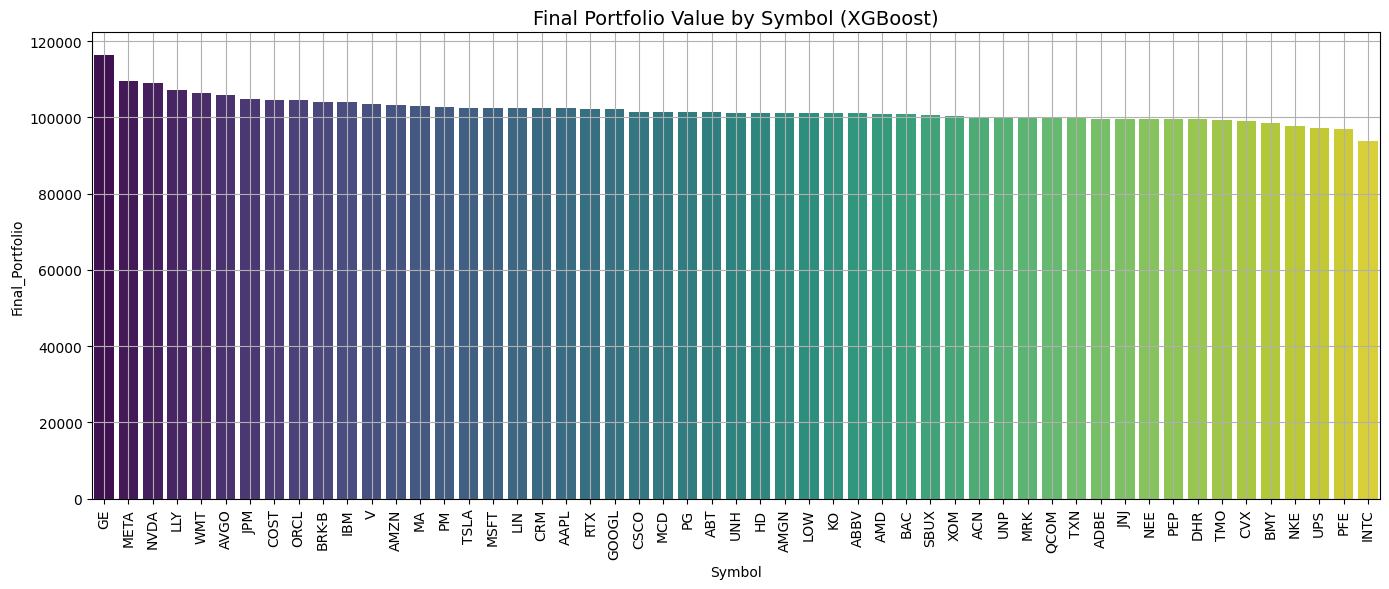

<ipython-input-40-e4d71ba200ca>:23: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


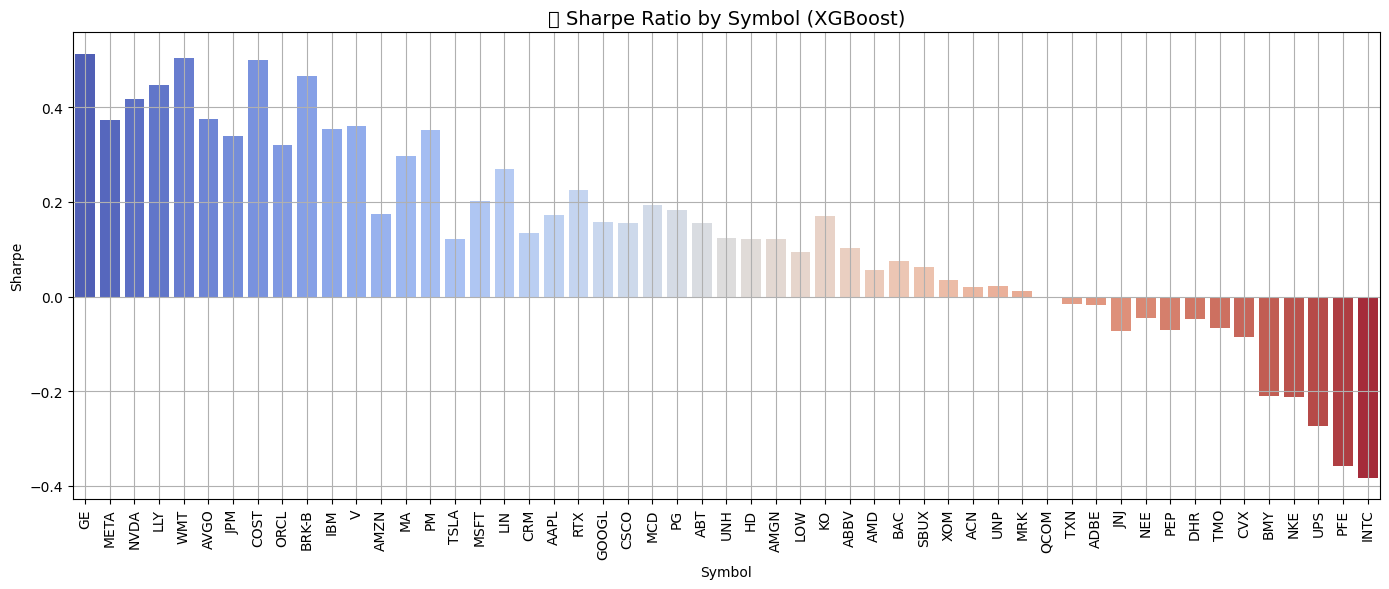

<ipython-input-40-e4d71ba200ca>:35: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


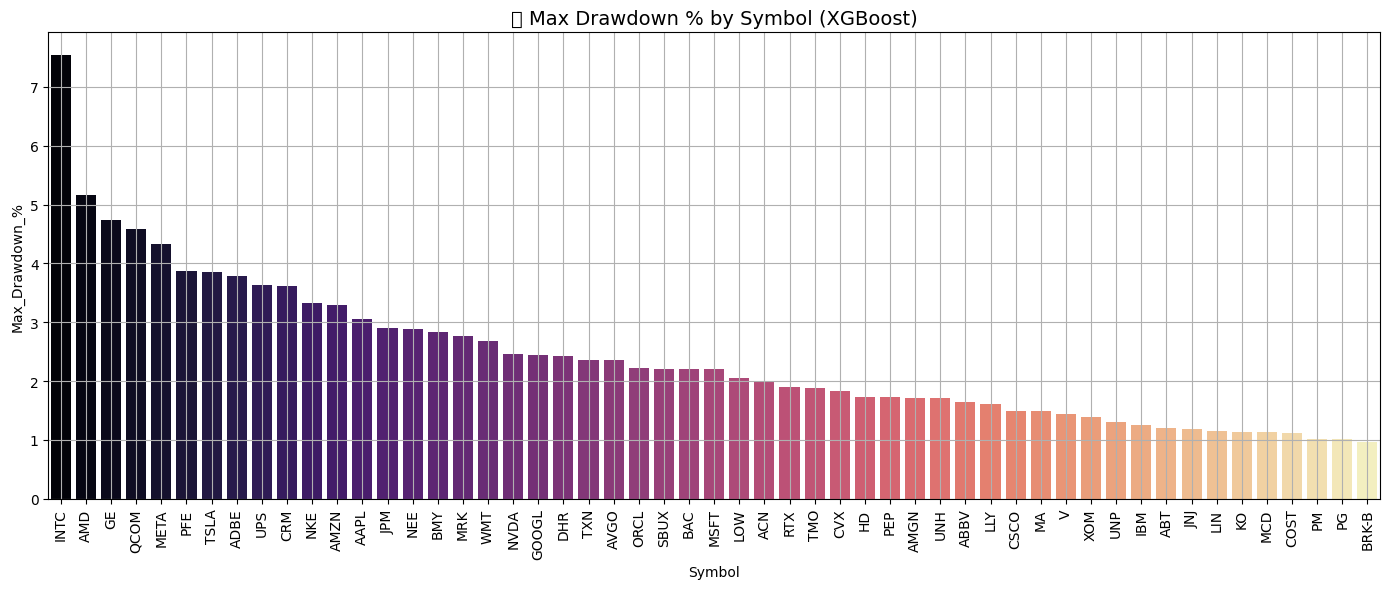

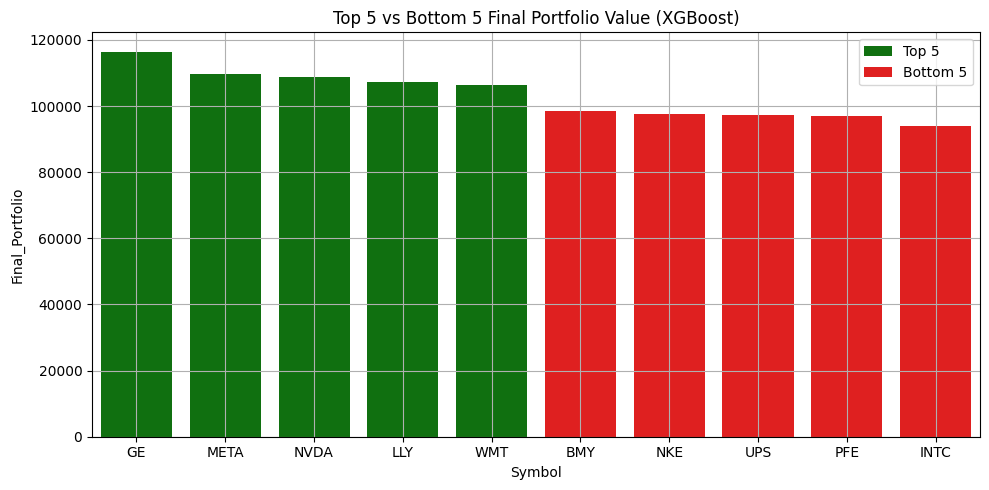

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

Prepare the data
df_viz = xgb_eval_summary.copy()
df_viz = df_viz.sort_values(by="Final_Portfolio", ascending=False)

#Final Portfolio Value
plt.figure(figsize=(14, 6))
sns.barplot(x="Symbol", y="Final_Portfolio", data=df_viz, hue="Symbol", palette="viridis", dodge=False, legend=False)
plt.title("Final Portfolio Value by Symbol (XGBoost)", fontsize=14)
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

#Sharpe Ratio
plt.figure(figsize=(14, 6))
sns.barplot(x="Symbol", y="Sharpe", data=df_viz, hue="Symbol", palette="coolwarm", dodge=False, legend=False)
plt.title("Sharpe Ratio by Symbol (XGBoost)", fontsize=14)
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

#Max Drawdown %
plt.figure(figsize=(14, 6))
sns.barplot(
    x="Symbol", y="Max_Drawdown_%", data=df_viz.sort_values(by="Max_Drawdown_%", ascending=False),
    hue="Symbol", palette="magma", dodge=False, legend=False
)
plt.title("Max Drawdown % by Symbol (XGBoost)", fontsize=14)
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

Top 5 vs Bottom 5 Final Portfolio
top_5 = df_viz.head(5)
bottom_5 = df_viz.tail(5)

plt.figure(figsize=(10, 5))
sns.barplot(x="Symbol", y="Final_Portfolio", data=top_5, color="green", label="Top 5")
sns.barplot(x="Symbol", y="Final_Portfolio", data=bottom_5, color="red", label="Bottom 5")
plt.title("Top 5 vs Bottom 5 Final Portfolio Value (XGBoost)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


♻️ AAPL Window 1/4: 0-3000
♻️ TSLA Window 1/4: 0-3000
♻️ AAPL Window 2/4: 500-3500
♻️ TSLA Window 2/4: 500-3500
♻️ AAPL Window 3/4: 1000-4000
♻️ TSLA Window 3/4: 1000-4000
♻️ AAPL Window 4/4: 1500-4500
♻️ TSLA Window 4/4: 1500-4500
♻️ MSFT Window 1/4: 0-3000
♻️ GOOGL Window 1/4: 0-3000
♻️ MSFT Window 2/4: 500-3500
♻️ GOOGL Window 2/4: 500-3500
♻️ MSFT Window 3/4: 1000-4000
♻️ GOOGL Window 3/4: 1000-4000
♻️ MSFT Window 4/4: 1500-4500
♻️ GOOGL Window 4/4: 1500-4500
♻️ AMZN Window 1/4: 0-3000
♻️ NVDA Window 1/4: 0-3000
♻️ AMZN Window 2/4: 500-3500
♻️ NVDA Window 2/4: 500-3500
♻️ AMZN Window 3/4: 1000-4000
♻️ NVDA Window 3/4: 1000-4000
♻️ AMZN Window 4/4: 1500-4500
♻️ NVDA Window 4/4: 1500-4500
♻️ META Window 1/4: 0-3000
♻️ BRK-B Window 1/4: 0-3000
♻️ META Window 2/4: 500-3500
♻️ BRK-B Window 2/4: 500-3500
♻️ META Window 3/4: 1000-4000
♻️ BRK-B Window 3/4: 1000-4000
♻️ META Window 4/4: 1500-4500
♻️ BRK-B Window 4/4: 1500-4500
♻️ JPM Window 1/4: 0-3000
♻️ JNJ Window 1/4: 0-3000
♻️ JPM Windo

<ipython-input-43-9ae9aa12509f>:114: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Ticker', y='Final_Portfolio', data=rf_summary, palette='viridis')


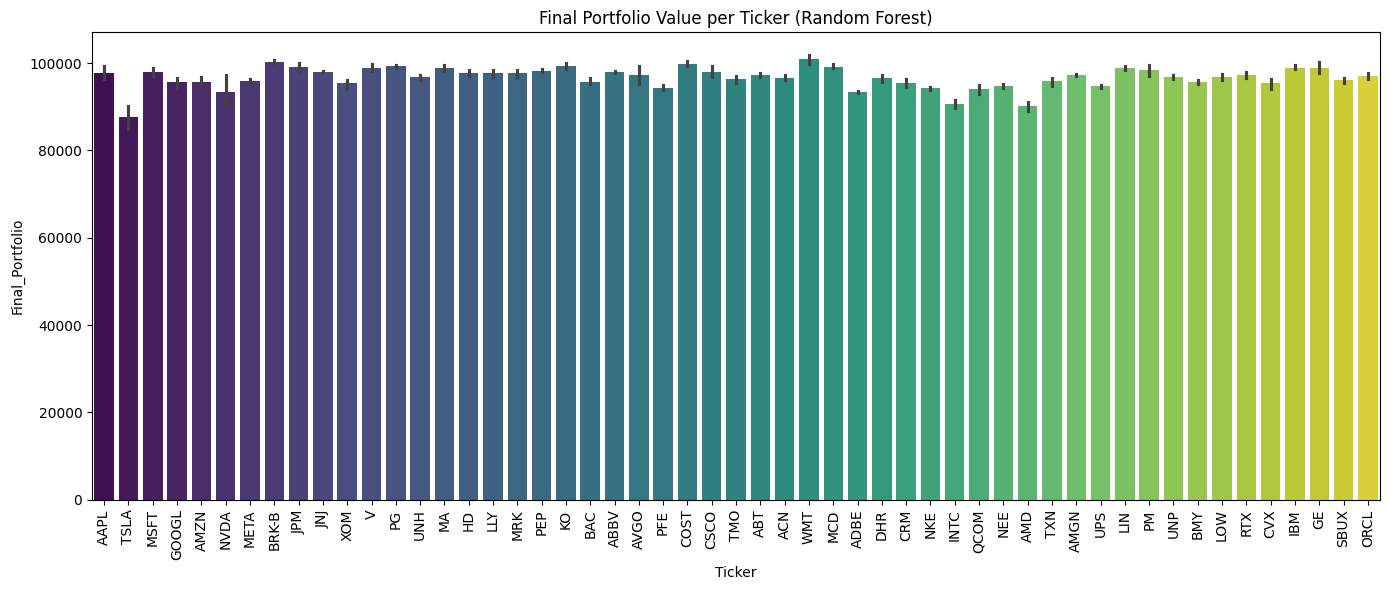

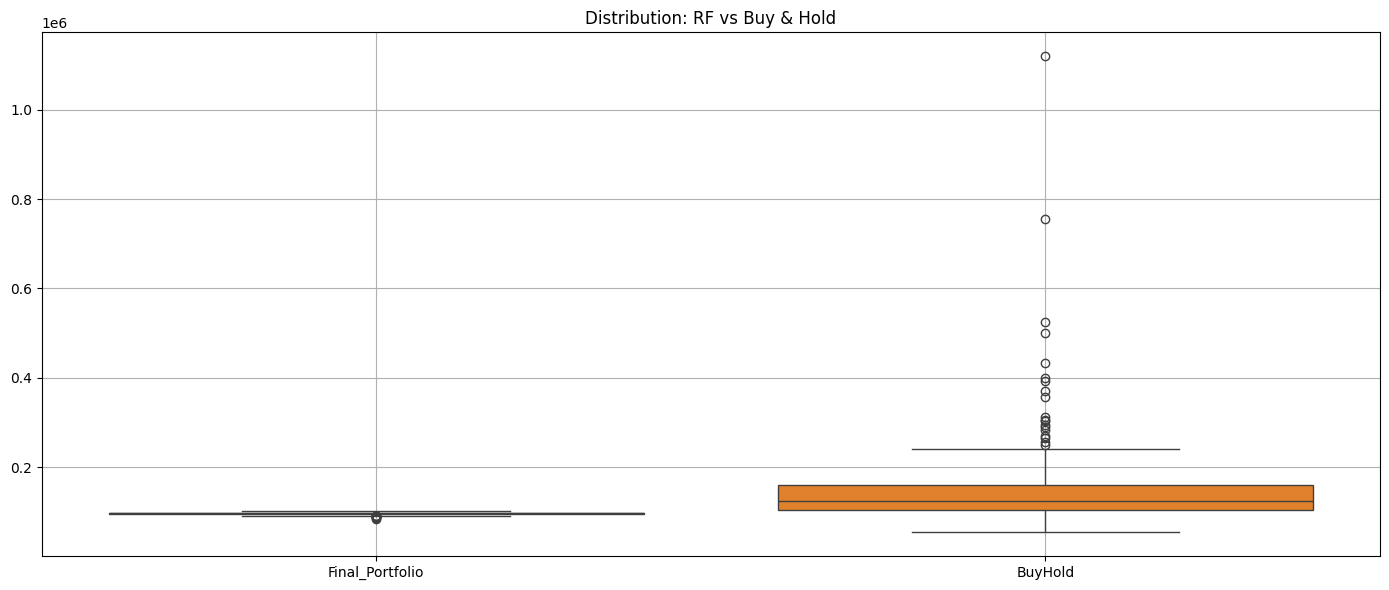

In [43]:
Random Forest Walkforward + Portfolio Simulation + Visualization

import os
import gc
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from concurrent.futures import ThreadPoolExecutor
import matplotlib.pyplot as plt
import seaborn as sns

Load Dataset
df = pd.read_csv("multi_stock_feature_engineered_dataset.csv")
df['Datetime'] = pd.to_datetime(df['Datetime'])
features = ['SMA_20', 'STD_20', 'Upper_Band', 'Lower_Band', 'Stoch']
label_map = {-1: 0, 0: 1, 1: 2}
target = "Target"

Walkforward Splits
def get_walk_forward_windows(df, window_size=3000, step_size=500, min_len=1000):
    return [(start, start + window_size)
            for start in range(0, len(df) - min_len, step_size)
            if start + window_size < len(df)]

Walkforward RF Trainer + Trade Simulation
def walkforward_rf(df, ticker, window_size=3000, step_size=500):
    results = []
    df = df.dropna(subset=features + [target]).copy()
    df['Target_Mapped'] = df[target].map(label_map)
    windows = get_walk_forward_windows(df, window_size, step_size)

    for w_idx, (start, end) in enumerate(windows):
        gc.collect()
        df_window = df.iloc[start:end].copy()
        if len(df_window) <= 52:
            continue

        print(f"♻️ {ticker} Window {w_idx+1}/{len(windows)}: {start}-{end}")
        X = df_window[features]
        y = df_window['Target_Mapped']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

        model = RandomForestClassifier(n_estimators=100, random_state=42)
        model.fit(X_train, y_train)
        acc = accuracy_score(y_test, model.predict(X_test))

        Trade Simulation
        df_window['Predicted'] = model.predict(df_window[features].shift(1).bfill())
        df_window['Signal'] = df_window['Predicted'].map({0: 0, 1: 1, 2: -1})

        capital = 100000
        trade_size = 0.05
        transaction_cost = 0.001
        shares = 0
        portfolio = []

        for _, row in df_window.iterrows():
            price = row['Close']
            signal = row['Signal']
            if signal == 1 and capital >= price and shares == 0:
                amount = capital * trade_size
                shares = amount // price
                capital -= shares * price * (1 + transaction_cost)
            elif signal == -1 and shares > 0:
                capital += shares * price * (1 - transaction_cost)
                shares = 0
            portfolio.append(capital + shares * price)

        final_value = portfolio[-1]
        hold_value = (100000 / df_window['Close'].iloc[0]) * df_window['Close'].iloc[-1]
        returns = pd.Series(portfolio).pct_change().fillna(0)
        sharpe = (returns.mean() / (returns.std() + 1e-6)) * np.sqrt(252)
        drawdown = ((pd.Series(portfolio).cummax() - pd.Series(portfolio)) / pd.Series(portfolio).cummax()).max() * 100

        results.append({
            "Ticker": ticker,
            "Window": f"{start}-{end}",
            "Accuracy": round(acc, 4),
            "Final_Portfolio": round(final_value, 2),
            "BuyHold": round(hold_value, 2),
            "Sharpe": round(sharpe, 3),
            "Drawdown_%": round(drawdown, 2),
            "Winner": "RF" if final_value > hold_value else "Buy & Hold"
        })

    return results

Run Ticker Parallel
def process_ticker_rf(ticker):
    df_ticker = df[df['Symbol'] == ticker].copy()
    if df_ticker.empty or len(df_ticker) < 3000:
        print(f"Skipping {ticker} due to insufficient data.")
        return []
    return walkforward_rf(df_ticker, ticker)

def run_parallel_tickers_rf(tickers, out_path="results/rf_walkforward/summary.csv"):
    os.makedirs("results/rf_walkforward", exist_ok=True)
    results = []
    with ThreadPoolExecutor(max_workers=min(8, os.cpu_count())) as executor:
        for result in executor.map(process_ticker_rf, tickers):
            results.extend(result)
            pd.DataFrame(results).to_csv(out_path, index=False)
    print(f"Results saved to {out_path}")
    return pd.DataFrame(results)

Execute
tickers = df['Symbol'].unique()
rf_summary = run_parallel_tickers_rf(tickers)

Visualization
plt.figure(figsize=(14, 6))
sns.barplot(x='Ticker', y='Final_Portfolio', data=rf_summary, palette='viridis')
plt.title('Final Portfolio Value per Ticker (Random Forest)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 6))
sns.boxplot(data=rf_summary[['Final_Portfolio', 'BuyHold']])
plt.title('Distribution: RF vs Buy & Hold')
plt.grid(True)
plt.tight_layout()
plt.show()


In [45]:
import pandas as pd

rf_results_path = "results/rf_walkforward/summary.csv"

if os.path.exists(rf_results_path):
    rf_summary = pd.read_csv(rf_results_path)
    print(f"Loaded {len(rf_summary)} rows from Random Forest results")
    display(rf_summary.head())
else:
    print("Summary file not found.")
import matplotlib.pyplot as plt
import seaborn as sns

Reload just to be sure
rf_summary = pd.read_csv("results/rf_walkforward/summary.csv")

Aggregate final portfolio values per ticker
agg_df = rf_summary.groupby("Ticker").agg({
    "Final_Portfolio": "mean",
    "BuyHold": "mean",
    "Sharpe": "mean",
    "Drawdown_%": "mean"
}).reset_index()

Top 5 performers
top5 = agg_df.sort_values(by="Final_Portfolio", ascending=False).head()

Bottom 5 performers
bottom5 = agg_df.sort_values(by="Final_Portfolio", ascending=True).head()


Loaded 212 rows from Random Forest results


,Ticker,Window,Accuracy,Final_Portfolio,BuyHold,Sharpe,Drawdown_%,Winner
0,AAPL,0-3000,0.7911,95825.24,130306.78,-0.850,4.41,Buy & Hold
1,AAPL,500-3500,0.7022,97654.56,139883.80,-0.463,3.61,Buy & Hold
2,AAPL,1000-4000,0.7622,99839.39,173854.83,-0.029,2.05,Buy & Hold
3,AAPL,1500-4500,0.6856,97491.72,138599.94,-0.577,2.84,Buy & Hold
4,TSLA,0-3000,0.2978,85718.70,84629.39,-1.792,14.50,RF
